<a href="https://colab.research.google.com/github/BahodirML/Coding_Practices/blob/main/COMPANY_ACQUISITION_123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#labelling
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('/content/companies.csv')
df.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [3]:
df.shape

(35978, 44)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35978 entries, 0 to 35977
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   35978 non-null  object 
 1   Unnamed: 0.1         35978 non-null  int64  
 2   entity_type          35978 non-null  object 
 3   entity_id            35978 non-null  int64  
 4   parent_id            0 non-null      float64
 5   name                 35974 non-null  object 
 6   normalized_name      35974 non-null  object 
 7   permalink            35978 non-null  object 
 8   category_code        27045 non-null  object 
 9   status               35977 non-null  object 
 10  founded_at           21904 non-null  object 
 11  closed_at            566 non-null    object 
 12  domain               27820 non-null  object 
 13  homepage_url         27820 non-null  object 
 14  twitter_username     19568 non-null  object 
 15  logo_url             25432 non-null 

In [5]:
df.dtypes

id                      object
Unnamed: 0.1             int64
entity_type             object
entity_id                int64
parent_id              float64
name                    object
normalized_name         object
permalink               object
category_code           object
status                  object
founded_at              object
closed_at               object
domain                  object
homepage_url            object
twitter_username        object
logo_url                object
logo_width             float64
logo_height            float64
short_description       object
description             object
overview                object
tag_list                object
country_code            object
state_code              object
city                    object
region                  object
first_investment_at     object
last_investment_at      object
investment_rounds      float64
invested_companies     float64
first_funding_at        object
last_funding_at         object
funding_

In [6]:
df.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,35978.000000,35978.000000,0.0,25432.000000,25432.000000,588.000000,588.000000,6648.000000,5.689000e+03,16969.000000,22315.000000,19095.000000,19095.000000,148.000000
mean,17988.500000,128671.545778,NaN,506.297342,245.856047,1.962585,1.823129,1.703369,1.436741e+07,1.265543,3.294914,37.288147,-49.924875,22.190756
std,10386.098329,57597.671172,NaN,656.043253,361.949673,3.693352,3.300820,1.227478,8.771869e+07,0.602499,10.214576,16.085993,70.500500,83.844848
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+03,1.000000,1.000000,-46.413187,-157.858333,0.014358
25%,8994.250000,137264.250000,NaN,200.000000,72.000000,1.000000,1.000000,1.000000,4.750000e+05,1.000000,1.000000,34.052234,-111.891047,2.311656
50%,17988.500000,152672.500000,NaN,287.000000,116.000000,1.000000,1.000000,1.000000,2.100000e+06,1.000000,2.000000,39.933363,-75.165222,5.541262
75%,26982.750000,165227.500000,NaN,517.000000,264.000000,2.000000,1.000000,2.000000,1.020000e+07,1.000000,3.000000,45.440847,0.121817,14.787879
max,35977.000000,176817.000000,NaN,17472.000000,9600.000000,49.000000,47.000000,15.000000,5.700000e+09,8.000000,1189.000000,77.553604,174.776236,954.548926


In [7]:
df.isnull().sum()

id                         0
Unnamed: 0.1               0
entity_type                0
entity_id                  0
parent_id              35978
name                       4
normalized_name            4
permalink                  0
category_code           8933
status                     1
founded_at             14074
closed_at              35412
domain                  8158
homepage_url            8158
twitter_username       16410
logo_url               10546
logo_width             10546
logo_height            10546
short_description      34593
description            14652
overview                8685
tag_list               14993
country_code           16122
state_code             24783
city                   16879
region                     1
first_investment_at    35392
last_investment_at     35392
investment_rounds      35390
invested_companies     35390
first_funding_at       29376
last_funding_at        29376
funding_rounds         29330
funding_total_usd      30289
first_mileston

In [8]:
# Dropping unnecessary columns
df.drop(['Unnamed: 0.1','entity_type','entity_id','parent_id','twitter_username','logo_url','short_description','description',
        'first_investment_at','closed_at','last_investment_at','investment_rounds','invested_companies'],axis=1,inplace=True)

In [9]:
# Filling the missing values of datetime type columns using ffill
date_columns = ['founded_at','first_funding_at','last_funding_at','first_milestone_at','last_milestone_at']

for i in date_columns:
    df[i].fillna(method='ffill',inplace = True)

In [10]:
# Filling the missing values in categorical columns with the value: 'Unavailable'
cat_columns = ['domain','homepage_url','overview','tag_list','name','normalized_name']

for x in cat_columns:
    df[x].fillna('Unavailable',inplace = True)

In [11]:
# Filling the missing values in the categorical columns with their respective mode values
cat_columns2 = ['category_code','country_code','state_code','city','created_by']

for i in cat_columns2:
    mode_val = df[i].mode()[0]
    df[i].fillna(mode_val,inplace = True)

In [12]:
# Filling the missing values in the latitude and longitude columns
df['lng'] = df['lng'].interpolate(method='linear')
df['lat'] = df['lat'].interpolate(method ='linear')

In [13]:
# Filling the missing values in numeric columns with their respective mean values
num_columns = ['logo_width','logo_height','funding_rounds','funding_total_usd','milestones','relationships','ROI']

for i in num_columns:
    df[i].fillna(df[i].mean(),inplace = True)

In [14]:
df.isnull().sum()

id                    0
name                  0
normalized_name       0
permalink             0
category_code         0
status                1
founded_at            0
domain                0
homepage_url          0
logo_width            0
logo_height           0
overview              0
tag_list              0
country_code          0
state_code            0
city                  0
region                1
first_funding_at      0
last_funding_at       0
funding_rounds        0
funding_total_usd     0
first_milestone_at    0
last_milestone_at     0
milestones            0
relationships         0
created_by            0
created_at            1
updated_at            1
lat                   0
lng                   0
ROI                   0
dtype: int64

In [15]:
# Changing the datatype of date columns from object to datetime type

df['founded_at'] = pd.to_datetime(df['founded_at'])
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'])
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'])
df['first_milestone_at'] = pd.to_datetime(df['first_milestone_at'])
df['last_milestone_at'] = pd.to_datetime(df['last_milestone_at'])
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35978 entries, 0 to 35977
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  35978 non-null  object        
 1   name                35978 non-null  object        
 2   normalized_name     35978 non-null  object        
 3   permalink           35978 non-null  object        
 4   category_code       35978 non-null  object        
 5   status              35977 non-null  object        
 6   founded_at          35978 non-null  datetime64[ns]
 7   domain              35978 non-null  object        
 8   homepage_url        35978 non-null  object        
 9   logo_width          35978 non-null  float64       
 10  logo_height         35978 non-null  float64       
 11  overview            35978 non-null  object        
 12  tag_list            35978 non-null  object        
 13  country_code        35978 non-null  object    

In [17]:
for col in df.columns:
    if df[col].dtype == 'datetime64[ns]':
        df[f'{col}_Day'] = df[col].dt.day
        df[f'{col}_Month'] = df[col].dt.month
        df[f'{col}_Year'] = df[col].dt.year

In [18]:
df.head(10)

,id,name,normalized_name,permalink,category_code,status,founded_at,domain,homepage_url,logo_width,...,first_milestone_at_Year,last_milestone_at_Day,last_milestone_at_Month,last_milestone_at_Year,created_at_Day,created_at_Month,created_at_Year,updated_at_Day,updated_at_Month,updated_at_Year
0,c:1,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,wetpaint-inc.com,http://wetpaint-inc.com,401.000000,...,2010,18,9,2013,25.0,5.0,2007.0,13.0,4.0,2013.0
1,c:10,Flektor,flektor,/company/flektor,games_video,acquired,2005-10-17,flektor.com,http://www.flektor.com,186.000000,...,2010,18,9,2013,31.0,5.0,2007.0,23.0,5.0,2008.0
2,c:100,There,there,/company/there,games_video,acquired,2005-10-17,there.com,http://www.there.com,107.000000,...,2003,23,9,2011,6.0,8.0,2007.0,4.0,11.0,2013.0
3,c:10000,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,mywebbo.com,http://www.mywebbo.com,506.297342,...,2003,23,9,2011,24.0,8.0,2008.0,6.0,9.0,2008.0
4,c:10001,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,themoviestreamer.com,http://themoviestreamer.com,200.000000,...,2003,23,9,2011,24.0,8.0,2008.0,6.0,9.0,2008.0
5,c:10002,Synergie Media,synergie media,/company/synergie-media,advertising,operating,2007-06-27,synergie-media.com,http://www.synergie-media.com,284.000000,...,2003,23,9,2011,24.0,8.0,2008.0,6.0,9.0,2008.0
6,c:10003,Green Basti Ecosystems,green basti ecosystems,/company/green-basti-ecosystems,cleantech,operating,2008-08-20,Unavailable,Unavailable,506.297342,...,2003,23,9,2011,24.0,8.0,2008.0,22.0,4.0,2010.0
7,c:100042,HostNine,hostnine,/company/hostnine,software,operating,2008-08-20,hostnine.com,http://www.hostnine.com,187.000000,...,2011,20,6,2011,7.0,9.0,2011.0,20.0,12.0,2011.0
8,c:10005,Thomas Publishing,thomas publishing,/company/thomas-publishing,advertising,operating,2008-08-20,thomaspublishing.com,http://www.thomaspublishing.com,276.000000,...,1999,1,6,1999,24.0,8.0,2008.0,19.0,11.0,2009.0
9,c:100062,Vetter Idea Management System,vetter idea management system,/company/vetter-idea-management-system,enterprise,operating,2011-08-01,getvetter.com,http://www.getvetter.com,200.000000,...,2011,1,8,2011,7.0,9.0,2011.0,24.0,9.0,2011.0


In [19]:
# Stats of numeric columns
numeric_columns = ['logo_width','logo_height','funding_rounds','funding_total_usd','milestones','relationships','lat','lng','ROI']
num_col_df = df[numeric_columns]
num_col_df.describe()

,logo_width,logo_height,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,35978.000000,35978.000000,35978.000000,3.597800e+04,35978.000000,35978.000000,35978.000000,35978.000000,35978.000000
mean,506.297342,245.856047,1.703369,1.436741e+07,1.265543,3.294914,37.158477,-49.668861,22.190756
std,551.571375,304.310848,0.527611,3.487863e+07,0.413770,8.044454,14.516044,64.072804,5.359479
min,1.000000,1.000000,1.000000,1.000000e+03,1.000000,1.000000,-46.413187,-157.858333,0.014358
25%,231.000000,86.000000,1.703369,1.436741e+07,1.000000,1.000000,34.092809,-97.743061,22.190756
50%,475.000000,225.000000,1.703369,1.436741e+07,1.265543,3.294914,39.479912,-74.005973,22.190756
75%,506.297342,245.856047,1.703369,1.436741e+07,1.265543,3.294914,44.331810,-0.127758,22.190756
max,17472.000000,9600.000000,15.000000,5.700000e+09,8.000000,1189.000000,77.553604,174.776236,954.548926


In [20]:
# Identifying outliers in numeric columns and imputing them with their median value
columns_with_outliers = ['logo_width','logo_height','relationships','ROI']

for i in columns_with_outliers:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR)))
    median = df[i].median()
    df.loc[outliers, i] = median

<Axes: xlabel='logo_width'>

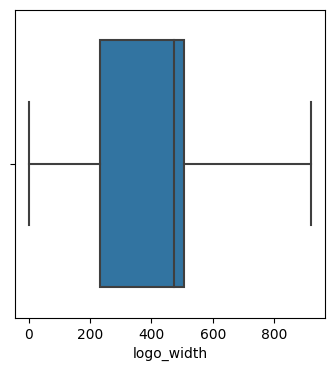

In [21]:
# Plotting the boxplot of logo_width variable
plt.figure(figsize=(4,4))
sns.boxplot(x="logo_width",data = df)

<Axes: xlabel='logo_height'>

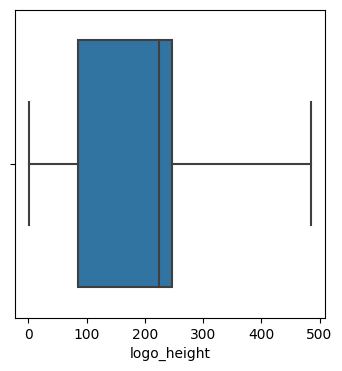

In [22]:
# Plotting the boxplot of logo_height variable
plt.figure(figsize=(4,4))
sns.boxplot(x="logo_height",data = df)

<Axes: xlabel='relationships'>

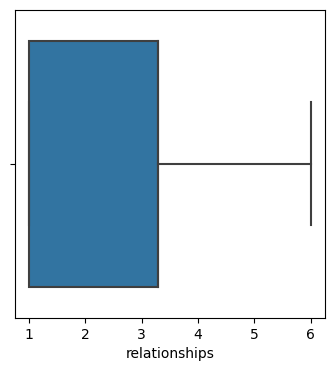

In [23]:
# Plotting the boxplot of relationships variable
plt.figure(figsize=(4,4))
sns.boxplot(x="relationships",data = df)

<Axes: xlabel='ROI'>

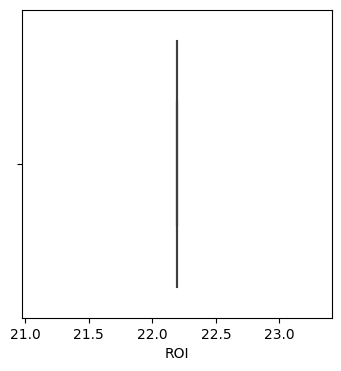

In [24]:
# Plotting the boxplot of ROI variable
plt.figure(figsize=(4,4))
sns.boxplot(x="ROI",data = df)

In [25]:
le = LabelEncoder()
# Transforming qualitative data into quantitative data
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [26]:
df.head()

,id,name,normalized_name,permalink,category_code,status,founded_at,domain,homepage_url,logo_width,...,first_milestone_at_Year,last_milestone_at_Day,last_milestone_at_Month,last_milestone_at_Year,created_at_Day,created_at_Month,created_at_Year,updated_at_Day,updated_at_Month,updated_at_Year
0,0,31810,34359,34410,41,3,2005-10-17,26559,6174,401.000000,...,2010,18,9,2013,25.0,5.0,2007.0,13.0,4.0,2013.0
1,1,10342,11127,11133,12,0,2005-10-17,8715,13300,186.000000,...,2010,18,9,2013,31.0,5.0,2007.0,23.0,5.0,2008.0
2,2,28835,31102,31153,12,0,2005-10-17,23960,24482,107.000000,...,2003,23,9,2011,6.0,8.0,2007.0,4.0,11.0,2013.0
3,3,16884,20636,20654,25,3,2008-07-26,16104,18684,506.297342,...,2003,23,9,2011,24.0,8.0,2008.0,6.0,9.0,2008.0
4,4,27619,30885,30928,12,3,2008-07-26,23916,5549,200.000000,...,2003,23,9,2011,24.0,8.0,2008.0,6.0,9.0,2008.0


In [27]:
df.isnull().sum()

id                          0
name                        0
normalized_name             0
permalink                   0
category_code               0
status                      0
founded_at                  0
domain                      0
homepage_url                0
logo_width                  0
logo_height                 0
overview                    0
tag_list                    0
country_code                0
state_code                  0
city                        0
region                      0
first_funding_at            0
last_funding_at             0
funding_rounds              0
funding_total_usd           0
first_milestone_at          0
last_milestone_at           0
milestones                  0
relationships               0
created_by                  0
created_at                  1
updated_at                  1
lat                         0
lng                         0
ROI                         0
founded_at_Day              0
founded_at_Month            0
founded_at

#EDA

In [29]:
cat = df.select_dtypes('object').columns.to_list()
cat

[]

ValueError: ignored

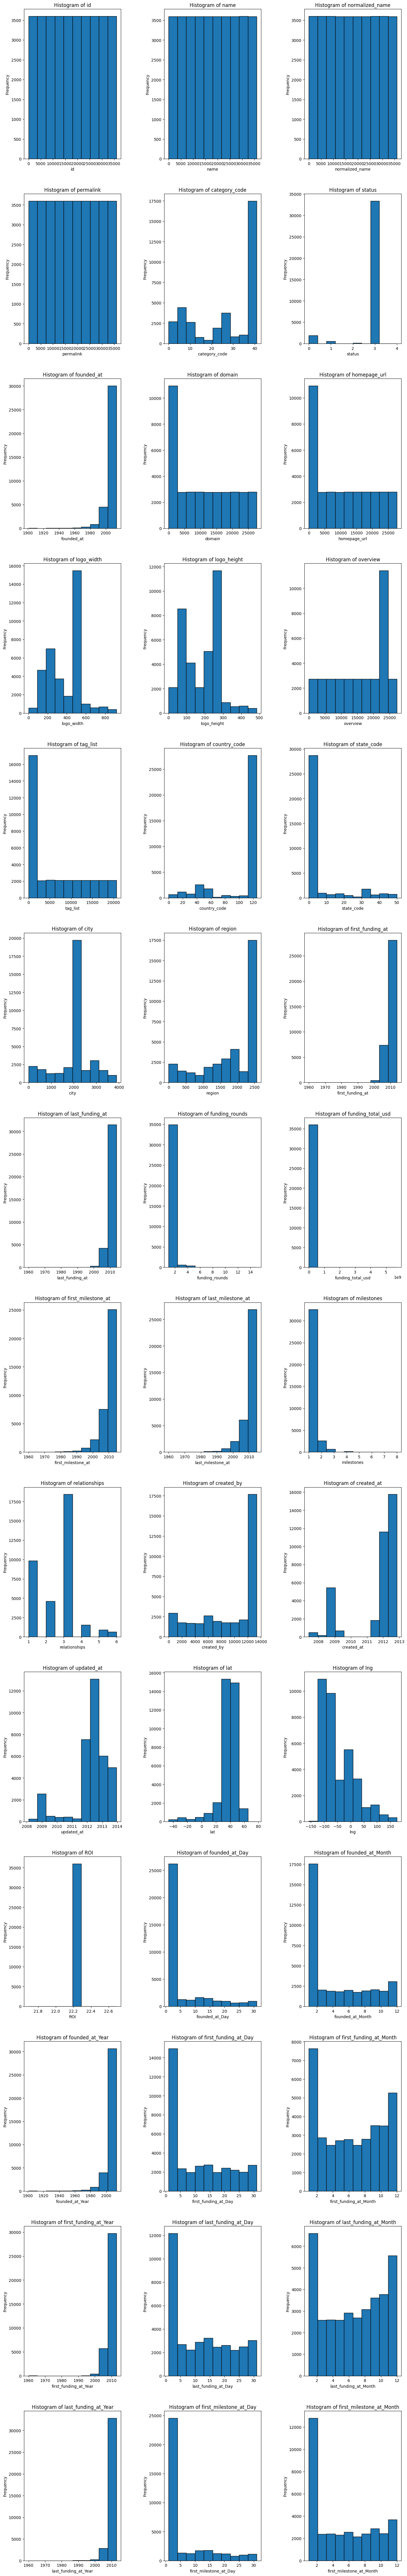

In [32]:
plt.figure(figsize=[15, 90])
for idx,column in enumerate(df,start=1):
  plt.subplot(14,3,idx)
  plt.hist(df[column], bins=10, edgecolor='black')
  plt.xlabel(f'{column}')
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {column}')
  plt.tight_layout(pad=4)
plt.show()